<a href="https://colab.research.google.com/github/Yusrah23/Python_Scripts/blob/master/training_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
# loading dataset

titanic_train_val = pd.read_csv('https://raw.githubusercontent.com/Yusrah23/Python_Scripts/master/train.csv', index_col=0)

In [3]:
data = titanic_train_val.copy()

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# shape

data.shape

(891, 11)

In [5]:
# info

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# checking for duplicate

data.duplicated().sum()

0

In [7]:
# checking for missing values

data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# checking statistical info

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Statiscal info shows that:

*   More than 75% of the passengers are below 38 years old
*   There are fewer aged passengers




In [9]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


The categorical summary shows that:


*   No duplicates in the names
*   There are duplicates in the cabin and Ticket features
*   72.44% of the passengers used S embarked
*   64.75% of the passengers are males



**EDA**

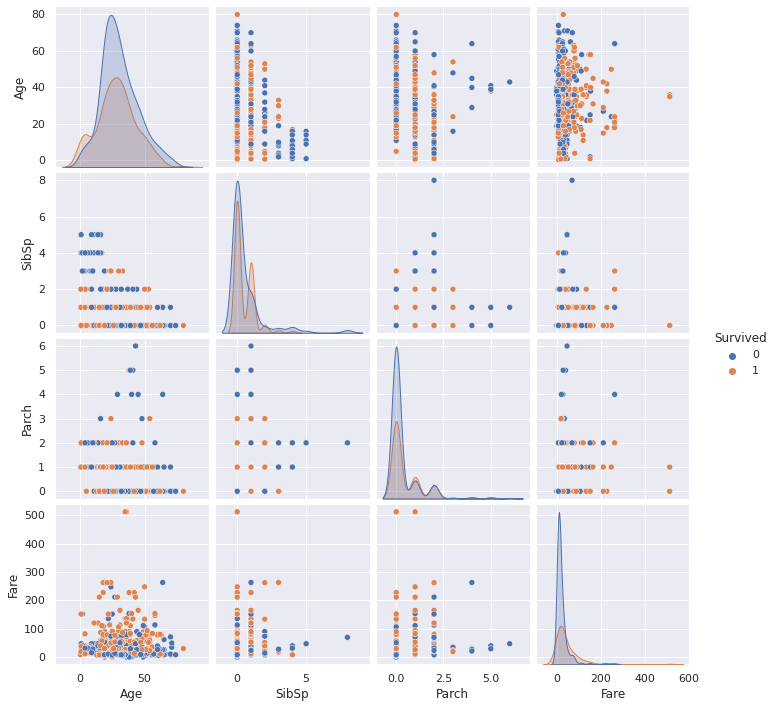

In [10]:
cols_to_plot = data.columns[2:].tolist() + ['Survived']
sns.pairplot(data[cols_to_plot], hue='Survived')
plt.show()

From the pairplot we can see that:

*   passengers in Pclass 1 survived more
*   The survival rate is more between age 0-50 years



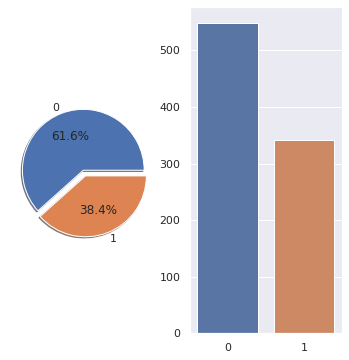

In [11]:
f,ax=plt.subplots(1,2,figsize=(6,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%0.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = data["Survived"] , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

We can see that 38.4% of the passengers survived.

**Discovering features and their correlation with survived**

In [12]:
def survived_bar_plot(feature):
    plt.figure(figsize = (6,6))
    sns.barplot(data = data , x = feature , y = "Survived").set_title(f"{feature} Vs Survived")
    plt.show()

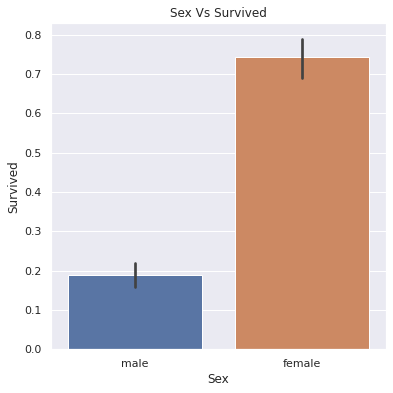

In [13]:
survived_bar_plot('Sex')

Females have a higher survival rate of 74%

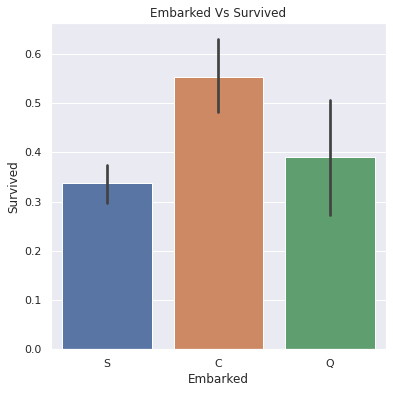

In [14]:
survived_bar_plot('Embarked')

Passengers with C embarked are most likely to survive 

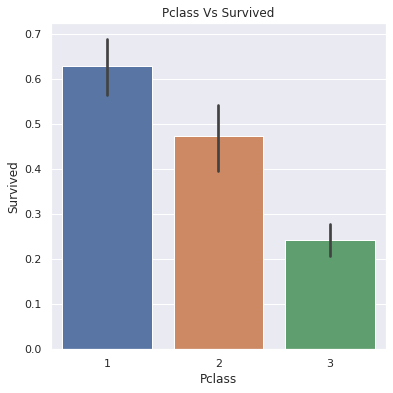

In [15]:
survived_bar_plot('Pclass')

Pclass 1 passengers are most likely to survive

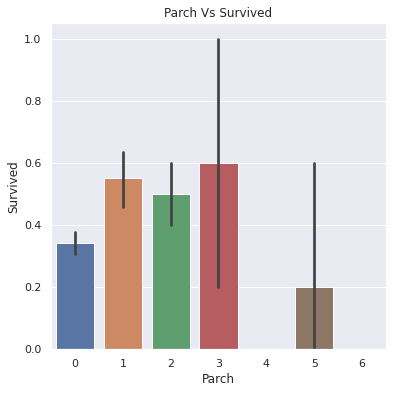

In [16]:
survived_bar_plot('Parch')

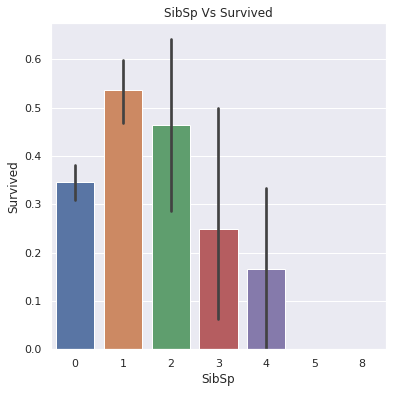

In [17]:
survived_bar_plot('SibSp')

Sibs and Parch has zero correlations for some values, which needs to be looked into.

In [18]:
def survived_hist_plot(feature):
    plt.figure(figsize = (6,6))
    sns.histplot(data = data , x = feature , hue = "Survived",palette = sns.color_palette(["orange" , "blue"]) ,
                 multiple = "stack" ).set_title(f"{feature} Vs Survived")
    plt.show()
    
    

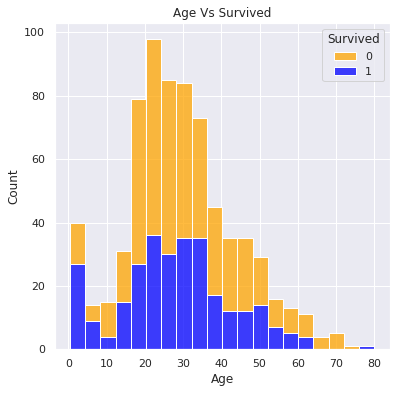

In [19]:
survived_hist_plot("Age")



*   Majority of the passengers are between 20-40 years
*   Children <=10 and elderly passengers >75 are more likely to survive.



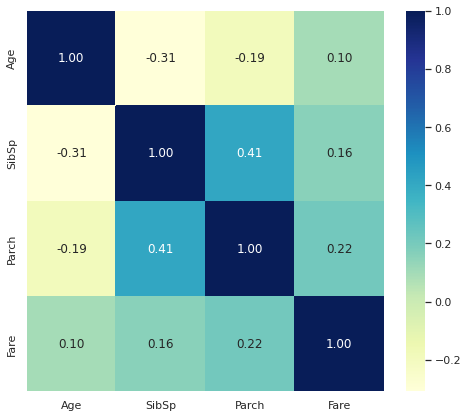

In [20]:
numerical_cols=['Age','SibSp','Parch','Fare']
plt.figure(figsize=(8,7))
sns.heatmap(data[numerical_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

In [21]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### **Data Wrangling**

In [22]:
# dropping columns

data.drop(columns = ["Ticket" , "Cabin", "Name"] , inplace = True)

In [23]:
#filling missing values

data["Age"].fillna(data["Age"].median(),inplace = True)
data["Embarked"].fillna("S",inplace = True)
data['Age'] = data['Age'].astype(int)

In [24]:
data['Fare'] = data['Fare'].astype(int)

In [25]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### **Converting categorical features to numerical features**

In [26]:
data['Pclass'] = data['Pclass'].astype(object)

In [27]:
#data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int) 
#data['Embarked'] = data['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)  

# one hot encoding

data = pd.get_dummies(data)

In [28]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Age         891 non-null    int64
 2   SibSp       891 non-null    int64
 3   Parch       891 non-null    int64
 4   Fare        891 non-null    int64
 5   Pclass_1    891 non-null    uint8
 6   Pclass_2    891 non-null    uint8
 7   Pclass_3    891 non-null    uint8
 8   Sex_female  891 non-null    uint8
 9   Sex_male    891 non-null    uint8
 10  Embarked_C  891 non-null    uint8
 11  Embarked_Q  891 non-null    uint8
 12  Embarked_S  891 non-null    uint8
dtypes: int64(5), uint8(8)
memory usage: 81.0 KB


In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Age,891.0,29.345679,13.028212,0.0,22.0,28.0,35.0,80.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,31.785634,49.703730,0.0,7.0,14.0,31.0,512.0
Pclass_1,891.0,0.242424,0.428790,0.0,0.0,0.0,0.0,1.0
Pclass_2,891.0,0.206510,0.405028,0.0,0.0,0.0,0.0,1.0
Pclass_3,891.0,0.551066,0.497665,0.0,0.0,1.0,1.0,1.0
Sex_female,891.0,0.352413,0.477990,0.0,0.0,0.0,1.0,1.0
Sex_male,891.0,0.647587,0.477990,0.0,0.0,1.0,1.0,1.0


##### **Feature Engineering**

In [30]:
# Creating a new column , FamilySize, from Sibps and Parch

data['FamilySize'] = data['SibSp'] + data['Parch'] 

data.drop(['Parch', 'SibSp'], axis=1 , inplace = True)
  


##### **SPLITTING**

In [31]:
# Extract X and y
X = data.drop("Survived",axis=1)
y = data["Survived"]


In [32]:
# train and test split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.15,random_state=1)

DECISION TREE

In [33]:
# Creating metric function 
def metrics_score(model, features, labels):
    predicted = model.predict(features)
    print(classification_report(labels, predicted))

    plot_confusion_matrix(model, features, labels)
    plt.grid(b=None)

    plt.show()

In [34]:
# Building decision tree model
model_1 = DecisionTreeClassifier(random_state = 4) # criterion = "entropy"

In [35]:
# Fitting the decision tree model
model_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       469
           1       0.99      0.92      0.95       288

    accuracy                           0.97       757
   macro avg       0.97      0.96      0.96       757
weighted avg       0.97      0.97      0.97       757



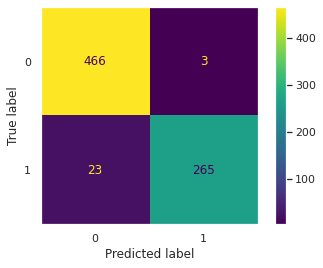

In [36]:
# performance check on training data

metrics_score(model_1, X_train, y_train)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        80
           1       0.79      0.63      0.70        54

    accuracy                           0.78       134
   macro avg       0.79      0.76      0.77       134
weighted avg       0.78      0.78      0.78       134



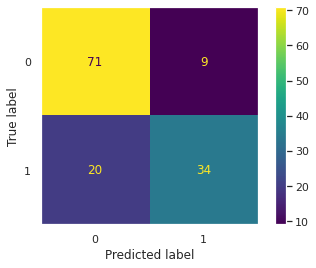

In [37]:
# performance check on validation set

metrics_score(model_1, X_val, y_val)

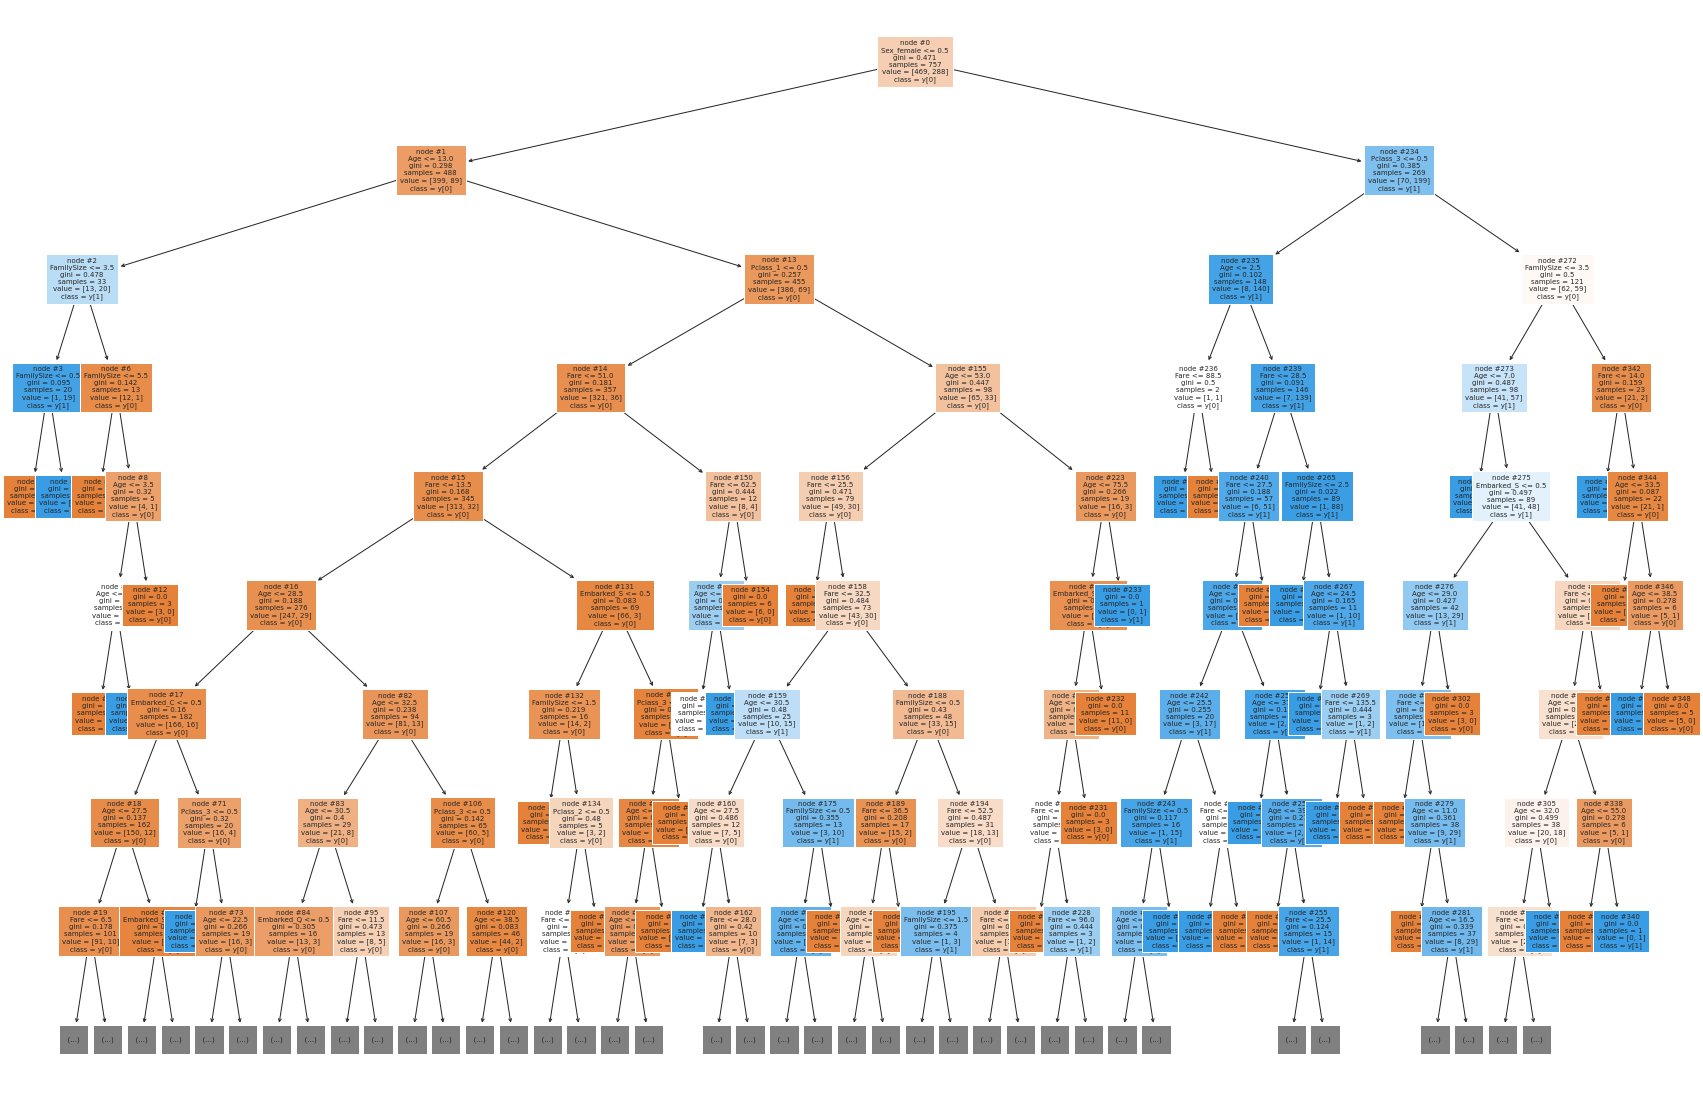

In [38]:
plt.figure(figsize = (30, 20))
tree.plot_tree(model_1, max_depth = 8, feature_names = X_train.columns, filled = True, fontsize = 7, node_ids = True, class_names = True);

In [39]:
# Scaling the data
sc=MinMaxScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Transform on test data
X_val_scaled=sc.transform(X_val)
X_val_scaled=pd.DataFrame(X_val_scaled, columns=X_train.columns)

In [40]:
model_2 = DecisionTreeClassifier(random_state = 1)

In [41]:
# Fitting the decision tree model
model_2.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       469
           1       0.99      0.92      0.95       288

    accuracy                           0.97       757
   macro avg       0.97      0.96      0.96       757
weighted avg       0.97      0.97      0.97       757



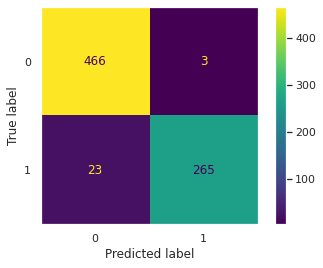

In [42]:
metrics_score(model_2, X_train_scaled, y_train)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.80      0.61      0.69        54

    accuracy                           0.78       134
   macro avg       0.79      0.76      0.76       134
weighted avg       0.79      0.78      0.78       134



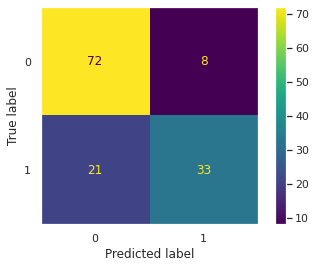

In [43]:
metrics_score(model_2, X_val_scaled, y_val)

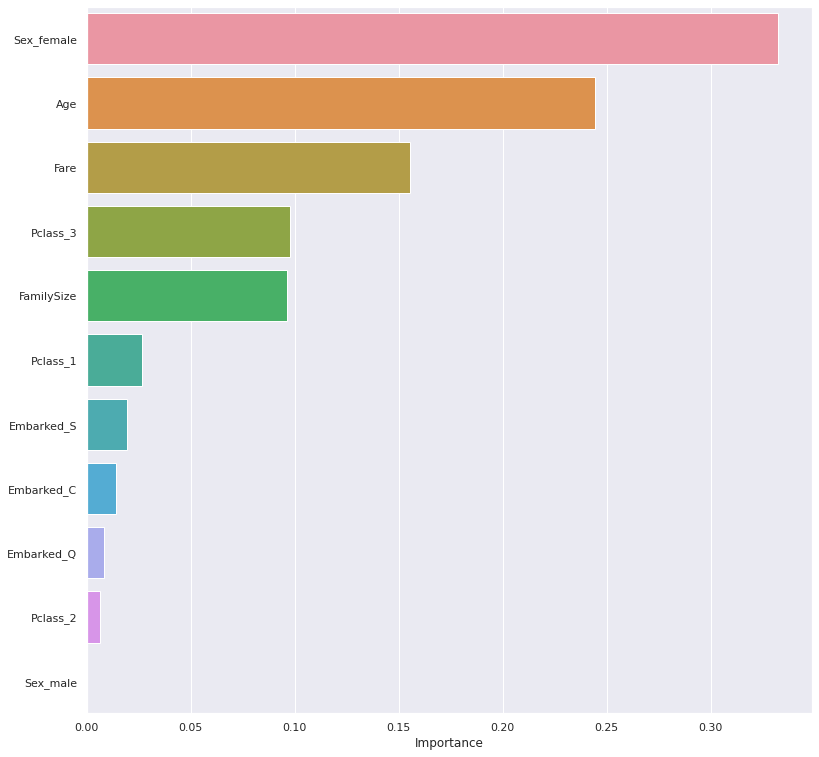

In [44]:
importances = model_1.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

In [45]:
# Fitting SVM
svm = SVC(kernel='rbf',probability=True) # Linear kernal or linear decision boundary
model_3 = svm.fit(X= X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       469
           1       0.89      0.60      0.72       288

    accuracy                           0.82       757
   macro avg       0.84      0.78      0.79       757
weighted avg       0.83      0.82      0.81       757



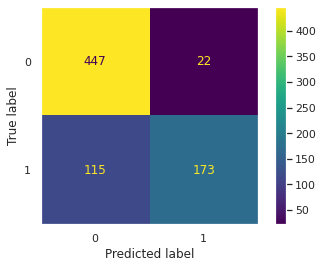

In [46]:
metrics_score(model_3, X_train_scaled, y_train)

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        80
           1       0.87      0.50      0.64        54

    accuracy                           0.77       134
   macro avg       0.80      0.72      0.73       134
weighted avg       0.79      0.77      0.75       134



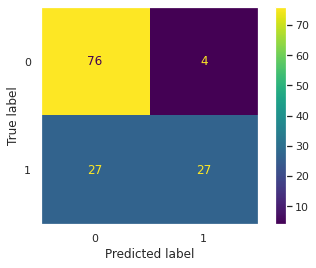

In [47]:
metrics_score(model_3, X_val_scaled, y_val)

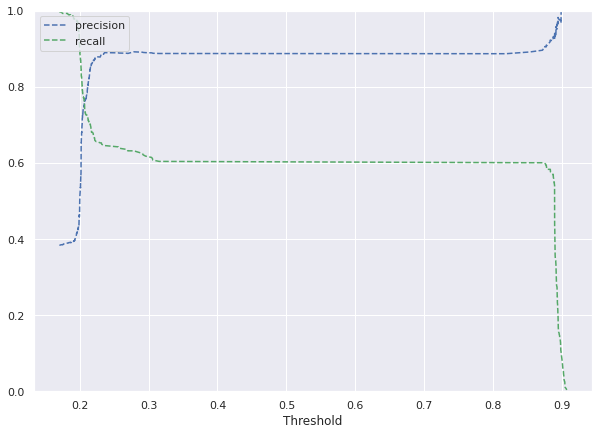

In [48]:
y_scores_svm=svm.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [49]:
# Creating metric function 
def metrics_score_mod(model, features, labels,th):
    predicted = model.predict_proba(features)
    predicted = predicted[:,1]>th
    print(classification_report(labels, predicted))

    plot_confusion_matrix(model, features, labels)
    plt.grid(b=None)

    plt.show()

              precision    recall  f1-score   support

           0       0.88      0.41      0.56       469
           1       0.48      0.91      0.63       288

    accuracy                           0.60       757
   macro avg       0.68      0.66      0.59       757
weighted avg       0.73      0.60      0.58       757



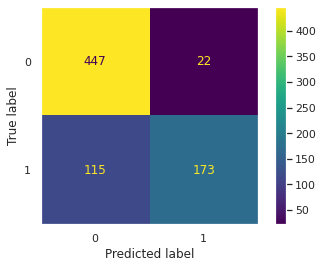

In [50]:
optimal_threshold = 0.2
metrics_score_mod(model_3, X_train_scaled, y_train,optimal_threshold)

In [51]:
model_4=LogisticRegression()
model_4.fit(X_train_scaled,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       469
           1       0.77      0.70      0.74       288

    accuracy                           0.81       757
   macro avg       0.80      0.79      0.79       757
weighted avg       0.81      0.81      0.81       757



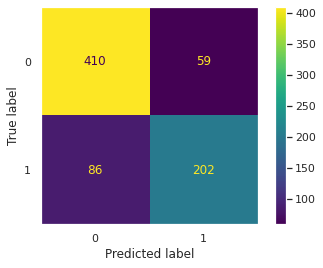

In [52]:
metrics_score(model_4, X_train_scaled, y_train)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        80
           1       0.76      0.69      0.72        54

    accuracy                           0.78       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.78      0.78      0.78       134



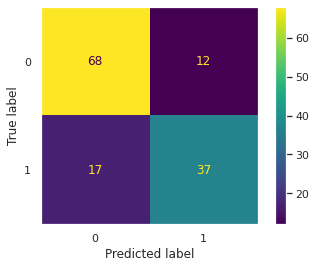

In [53]:
metrics_score(model_4, X_val_scaled, y_val)